# Connect Four: AI Algorithm Analysis

*By Joesph Larson, Spencer Lofing, and Joel Kraft*

## Introduction

This project is based on our groups collective interest in the comparison of different AI algorithms in a game context. We were curious to see with given a game, what AI algorithm would preform better. The two algorithms used in this project are Negamax AB Pruning and Q Scaling. Connect Four was the game we used as a basis for comparing the performance of each algorithm against a variety of opponents. Opponents include random players, opposing AI algorithms, and human players. 

Connect Four is a two person game that involves a 6x7 grid. The two opponents have colored chips (Red - 'R' and Blue - 'B'). The opponents alternate placing a chip in one of the columns with the goal of getting four of their color in a row. In the physical representation of the game the board is vertical. This means when a chip is placed it goes to the lowest row.

Group Member Roles:

*Joseph Larson* - Q Learning Algorithm development/implementation

*Spencer Lofing* - Negamax AB Pruning development/implementation

*Joel Kraft* - General Game, random player, and user player implementation

## Methods

The code for this project can be broken down into three sections: General Game, Negamax AB Pruning, and Q Learning. In general the "players" were designed with their designated algorithm so that they could be used through the `makeMove` function. This modular design allowed multiple opponents to be designed around one game structure for versatile testing and implementation. The three sections are discussed more in-depth below.

### General Game Play

The general game play was designed to take in two opponents. These opponents are then used to make alternating moves until one of them wins. The results of the method contains the winning opponent and the number of moves.

The play game function was implemented in the function: `[winner,NumberOfMoves] = playgame(algorithm1MakeMove, algorithm2MakeMove, verbose=False)`:

   - `algorithm1MakeMove`: The make move algorithm for the first opponent
   - `algorithm2MakeMove`: The make move algorithm for the first opponent
   - `verbose`: This flag is True for printing all of the board steps. False keeps the output hidden
   - `[winner, NumberOfMoves]`: winner is a 1 for opponent 1 or 2 for opponent 2. A 0 is returned in the event of a tie. NumberOfMoves gives the number of moves until the solution was reached

The make move algorithms for these are expected to take in a state and a color. They then return the new state of the board.

An example of the general game play is shown below using two random players.

In [1]:
from TPmysolution import *

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X B X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X R B X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R B R B X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R B R B R X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X B X X X 
R B R B R X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X B X X X 
R B R B R X X 

X X X X X X X 
X X X X X X X 
X X X B X X X 
X X X R X X X 
X X X B X X X 
R B R B R X X 

X X X X X X X 
X X X X X X X 
X X X B X X X 
X X X R X X X 
X X R B X X X 
R B R B R X X 

X X X X X X X 
X X X B X X X 
X X X B X X X 
X X X R X X X 
X X R B X X X 
R B R B R X X 

X X X R X X X 
X X X B X X X 
X X X B X X X 
X X X R X X X 
X X R B X X X 
R B R B R X X 


In [2]:
playgame(randomPlayerMakeMove,randomPlayerMakeMove)

(1, 31)

In [3]:
playgame(randomPlayerMakeMove,randomPlayerMakeMove,True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B R X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B R X X X R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X B X X X X X 
B R X X X R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 
X B X X X X X 
B R X X X R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 
X B X X X X X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 
X B X X R X X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X B X X 
X B X X R X X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X B X X 
X B X X R R X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X B X X 
X R X X B X X 
X B X X R R X 
B R X X B R X 

X X X X X X X 
X X X X X X X 
X X X X B X X 
X R X X B X X 
X B X X R R X 
B R R X B R X 


(1, 21)

A user can also serve as a playing function through the user make move function. The user is given the options of columns (0 indexed) and shown their color. After the user inputs their desired move the opponent is given a chance to play. An example of user verses the random player is given below.

In [4]:
playgame(userInputMakeMove,randomPlayerMakeMove)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X B 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X R B X B 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X R X X X 
X B X R B X B 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3


(1, 7)

The random player is shown against the user. The user was the Red - 'R' player and won fairly quickly and easily.

### Negamax AB Pruning

Negamax AB Pruning was one of the AI algorithms implemented in our connect four game. The AB pruning opponent can be called by its `makeMoveABPruning()` function. This function utilizes the AB Pruning code from CS440 and adapted it to run and operate in the connect four game.

Negamax AB Pruning relies on the negamax function which uses a utility function to determine the best move a player could make. In this particular implementation, a winning move was assigned a value of 1, a losing move was assigned a value of -1, and a "neutral" move - that which would cause a tie or a non-win state was assigned a 0. These values were back-propogated through a series of move decisions, so that a move which would certainly lead to a win would be assigned a 1, a move which would certainly lead to a loss would be assigned a -1 and a move leading to a neutral board state would be assigned a 0. The negamax algorithm assumes that its opponent is using this same utility function so that it will be able to predict what the opponent will do in a given situation. This fact allows the negamax algorithm to back-propogate the value of a move through a decision tree where each node on the tree represents a board state and each branch represents a possible move.

The negamax function has a high memory and time complexity if it is not limited in some way. This is especially true in the game Connect 4 where a possible decision tree would take a start state and explore each possible state of the board until a winning one is found. In order to circumvent this issue our team implemented iterative depth search and AB pruning. Iterative depth search allows the user to place a limit on how far down the decision tree the algorithm will search for a solution. It also prevents a scenario where a winning state exists one move away, but the algorithm is too busy searching down one errant path to find the simple solution. In short, AB pruning introduces the capacity for the algorithm to "cut off" a piece of the decision tree if it is found that the move leading to that sub-tree will not produce a winning state.

The AB pruning model worked very well. It is a little slow in its initial responses as it searches through the rather large list of possible solutions. This processing time decreases significantly as the game goes on. This opponent is very hard to beat. An example game play of this AI method against a user is shown below.

In [7]:
playgame(userInputMakeMove,makeMoveABPruning)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 5
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X R X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 6
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X X X R R 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 4
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X B R R R 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 6
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X X X X R 
B X X B R R R 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 0
X X X X X X X 
B X X X X X X 
R X X

(1, 17)

The AB player searches all of the possible solutions while pruning away paths that are not feasible or paths that would definitely lead to a loss. Due to its ability to see all of the possible solutions it can be hard to beat. It is not impossible as shown in the game above. Overall the AB method seems to present a well balanced and intelligent opponent to play against. So far the only down side to this AI algorithm is the time that it takes to complete a game. 

In [6]:
playgame(randomPlayerMakeMove,makeMoveABPruning)

(2, 12)

When AB pruning plays itself it always has the exact same output with the same winner, number of moves, and resulting board. This might be an indication that it is impossible to play a perfect Tie in connect four without one player winning. It might also show that the second player can always win. These are rough theories that will be looked at more in-depth with the other algorithms.

In [8]:
playgame(makeMoveABPruning,makeMoveABPruning)

(2, 38)

In [9]:
playgame(makeMoveABPruning,makeMoveABPruning)

(2, 38)

In [10]:
playgame(makeMoveABPruning,makeMoveABPruning)

(2, 38)

In [11]:
playgame(makeMoveABPruning,makeMoveABPruning,True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 


(2, 38)

In [12]:
playgame(makeMoveABPruning,makeMoveABPruning,True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 

B X X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 
B B X X X X X 
R R X X X X X 


(2, 38)

### Q Learning

Q Learning was the second AI algorithm implemented in our connect four game. The Q Learning algorithm must be trained initially and then called through its `makeQFunctionMove()` function. This function requires the training data be present in a global variable `Q`. The training of the Q function is rather time consuming but once it is completed the decisions for the algorithm are very quick. 

trainQ takes in six arguments 

* nRepetitions - the number of times to train the Q functions
* learningRate - the factor to count each training cycle with 
* epsilonDecayFactor - the rate of which we go from picking a random move to picking an already done move
* validMovesF - the function that returns a list of valid moves 
* makeMovesF - the function that applies the move to the states and returns a new state
* startState - the starting value of the puzzle

Inside trainQ we are going to play nRepetition number of games.  First we are going to create a dictionary to store the Q values we found and also a list to keep track of the number of steps.  Epsilon will start at 1 so that we are gaurenteed to pick random moves.  We also want to define the winning step.  

For each game played we are going to decay epsilon by the decayFactor.  The end goal is to get epsilon close to 0 so we are going solely based on the Q function.  We drop it by the same factor every game.  We set the game to start at the same state everytime and then loop through moves until a win is found.  

Every move made increments the step counter.  A call to the epsilonGreedy function gets the next move.  EpsilonGreedy will take the current epsilon value and compare it to a random number.  If it is less then epsilon, then a random valid move will be returned.  If the value is greater then epsilon, then the move returned is the one that has the lowest value in the Q function that is a valid move from the current state.  

Once the move is chosen, we apply it to the state and check the new state for a win.  If won, we set the value of the previous state and move to 0 in our Q function.  

If this is not the first step, then the previous step needs to be updated with-in the Q function to show the progress or lack of progress this step took towards the goal.  To update this value, we need to add the value of the learningRate multplied by one plus the difference between the the Q value for this move and the last move.  This will help the Q function start to adjust the values to match the most ideal path from start to finish.  

Once this data is stored, the function saves the current move and state for future use, and goes back for the next move.  

makeQFunctionMove takes in two arguments 

 * state - the current game state.   
 * color - the color of the current player
 
makeQFunction gets a list of valid moves and then gets a list of all possible Q values from the trained Q dictionary.  Then the move is is chosen from the largest Q returned from the list.  The move is then made with the color passed in initially.  The newState is returned.

In [11]:
Q, stepsToGoal = trainQ(25000, 0.4, 0.9, validMoves, makeMove)

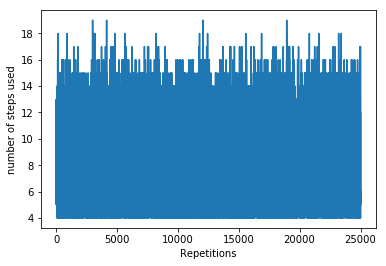

In [12]:
import matplotlib.pyplot as plt
plt.plot(stepsToGoal)
plt.ylabel('number of steps used') 
plt.xlabel('Repetitions')
plt.show()

The results of the Q learning show that the number of steps never fully decreases below 14. This means the best the function seems to be able to do it a victory in 14 steps. Ideally the lower this number, the better the algorithm. This number is not a bad number. To put it into perspective, the AB algorithm was able to beat the random player in roughly 17 moves in the example above. This would fall within the range shown for the Q Learning. As the training improves and the algorithm gets better through larger sets or different training percentages, the value would hopefully decrease. As the average number of steps decreases, the algorithm shows it is learning the game better and able to win in less moves.

## Results

To compare the algorithms we first wanted to establish the validity of the random player and use that as a guideline for the comparisons. To show the random player is truly random 1000 trials of two random players is given below. The results are very close to a 50/50 split. This means the random players do seem to be random and there is an equal chance that each could win. Branching off from this base case we can start to analyze the other algorithms. There were also a small number of 'Ties' showing that it is possible in the game of connect four to tie. This is extremely rare however and only took place in 0.2% of the trials.

In [12]:
[Rand1Win, Rand2Win, Ties3, AverageMoves3]=mutlipleTrials(randomPlayerMakeMove,randomPlayerMakeMove,1000)

In [13]:
print("Rand1 won: " + str(Rand1Win))
print("Rand2 Won: " + str(Rand2Win))
print("Ties: " + str(Ties3))
print("Average Moves: " + str(AverageMoves3))

Rand1 won: 555
Rand2 Won: 445
Ties: 0
Average Moves: 21.561


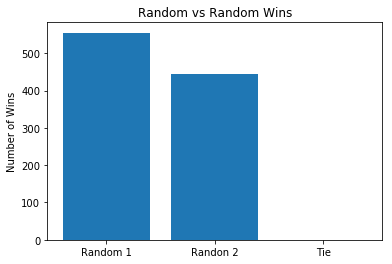

In [14]:
import matplotlib.pyplot as plt
objects = ('Random 1', 'Randon 2', 'Tie')
y_pos = np.arange(len(objects))
data = [Rand1Win, Rand2Win, Ties3]

plt.bar(y_pos,data, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Wins')
plt.title('Random vs Random Wins')

plt.show()

The AB Pruning algorithm is tested next. First it is run against the random opponent to see how it preforms against our base case. 

In [10]:
[ABWin2, RandWin2, Ties2, AverageMoves2]=mutlipleTrials(makeMoveABPruning,randomPlayerMakeMove,50)

In [11]:
print("AB won: " + str(ABWin2))
print("Rand Won: " + str(RandWin2))
print("Ties: " + str(Ties2))
print("Average Moves: " + str(AverageMoves2))

AB won: 49
Rand Won: 1
Ties: 0
Average Moves: 11.22


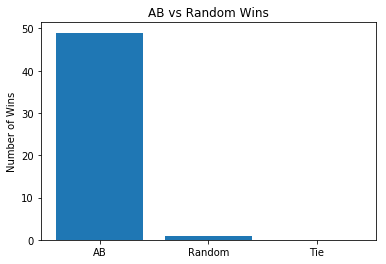

In [15]:
import matplotlib.pyplot as plt
objects = ('AB', 'Random', 'Tie')
y_pos = np.arange(len(objects))
data = [ABWin2, RandWin2, Ties2]

plt.bar(y_pos,data, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Wins')
plt.title('AB vs Random Wins')

plt.show()

Against the base case of the random player the AB algorithm did very well. It only let the random player win a small number of times. This shows that the algorithm is not perfect. It only searches a finite number of levels down to minimize the computation times for the game. Since it is not searching all of the way to the end of every case it is possible that it might lose occasionally. The number of moves that was used in the games is significantly lower than our base case of the two random players. This shows that the AB method is better than random and is able to win a significant number of times.

The Q Learning algorithm can also be tested against our base opponent. The results of 50 trials are shown below. (For our implementations the Q function must be the second player.)

In [8]:
[RandWin1, QWin1, Ties1, AverageMoves1]=mutlipleTrials(randomPlayerMakeMove,makeQFunctionMove,50)

In [9]:
print("Rand won: " + str(RandWin1))
print("Q Won: " + str(QWin1))
print("Ties: " + str(Ties1))
print("Average Moves: " + str(AverageMoves1))

Rand won: 8
Q Won: 42
Ties: 0
Average Moves: 11.68


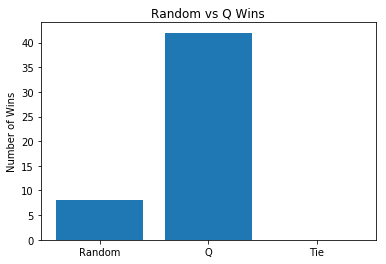

In [16]:
import matplotlib.pyplot as plt
objects = ('Random', 'Q', 'Tie')
y_pos = np.arange(len(objects))
data = [RandWin1, QWin1, Ties1]

plt.bar(y_pos,data, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Wins')
plt.title('Random vs Q Wins')

plt.show()

The final test between our algorithms is a battle between them. The AB pruning is played against the Q Learning to see which opponent wins and how often. We will also look at the number of moves and see if that varies from our other selections. Ideally the number of moves would be rather high since each player would be smart enough to not fall for simple early losses. 50 data points are used due to the long amount of time it takes to run a simulation with the AB pruning method.

In [3]:
[ABWin, QWin, Ties, AverageMoves]=mutlipleTrials(makeMoveABPruning,makeQFunctionMove,50)

In [4]:
print("AB won: " + str(ABWin))
print("Q Won: " + str(QWin))
print("Ties: " + str(Ties))
print("Average Moves: " + str(AverageMoves))

AB won: 0
Q Won: 50
Ties: 0
Average Moves: 38.0


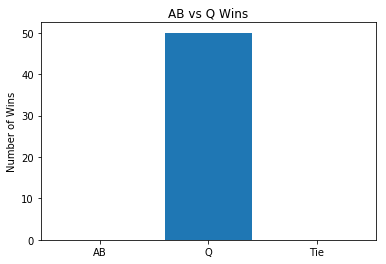

In [17]:
import matplotlib.pyplot as plt
objects = ('AB', 'Q', 'Tie')
y_pos = np.arange(len(objects))
data = [ABWin, QWin, Ties]

plt.bar(y_pos,data, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Wins')
plt.title('AB vs Q Wins')

plt.show()

In [20]:
playgame(makeMoveABPruning,makeQFunctionMove)

(2, 38)

In [21]:
playgame(makeMoveABPruning,makeQFunctionMove)

(2, 38)

In [7]:
playgame(userInputMakeMove,makeQFunctionMove)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 3
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X R X X X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 4
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X R R X X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 5
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X X X X X 
B X X R R R X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 0
X X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
B X X X X X X 
B X X R R R X 

You are: 'R'
Possible Options: 
[0, 1, 2, 3, 4, 5, 6]
enter number of column (0-6) of desired move: 6


(1, 9)

The results of the final test of AB against Q show that Q wins every time. Each of these victories takes 38 moves and produces that same game board. These algorithms must follow the same initial steps every time to get the starting game board. As the game progresses Q is able to get the upper hand and reach the goal. The high number of moves is expected since both algorithms are well trained and will hopefully not falter with relatively simple game boards.

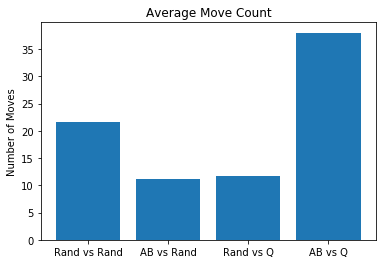

In [19]:
import matplotlib.pyplot as plt
objects = ('Rand vs Rand', 'AB vs Rand', 'Rand vs Q','AB vs Q')
y_pos = np.arange(len(objects))
data = [AverageMoves3,AverageMoves2,AverageMoves1,AverageMoves]

plt.bar(y_pos,data, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Moves')
plt.title('Average Move Count')

plt.show()

The average number of moves for each of the battles is given in the graph above. AB and Q had the most moves when they played. This makes sense since they both used a strategy and could block each other when they got close to a victory. AB and Q were very close in move count when they played against the random player. AB was a little lower meaning it beat the random player slightly quicker but both are similar against the base case. The two random players had a moderately high move count. This again is to be expected due to the nature of their decisions in the game play.

## Conclusion

The goal of this project was to develop several opponents for a game and test how they preformed against each other. To accomplish this we created a connect four game interface that would allow any algorithm with a valid `makeMove()` function to play. For the scope of our project we developed players for random, Negamax AB pruning, and Q Learning algorithms as well as functionality for the user to play. The random player was used as a base case for the algorithm comparisons. 

Our results showed that both the AB and Q algorithms worked well against the random opponent. While the random player's average number of moves against itself was rather high, against an AI algorithm the number decreased significantly. In our testing the AI algorithms were able to beat the random player in at least 80% of the games. The lack of a perfect 100% shows that these algorithms are not perfect. They only search a certain depth and were only trained for a certain amount of time. They play the game well against the opponent but it is possible for them to lose.

The user opponent was used in the project as a sanity check. When an algorithm was completed it provided a way for us to play it and see how it reacted to different situations. For the most part the AB method works very well against a human player. The moves seem logical but can sometimes not be the best choice which results in a loss. While the Q learning seems to do very well against the AB algorithm and the random algorithm, it does not do very well against a human. While the initial moves make sense, after awhile it starts to waver. This allows the user to beat it in a small number moves. Its ability to win against the AB algorithm might be due to their similar design and programming for initial moves. As the game starts the number of options is rather large. This prevents AB from completing a search over the entire tree. To manage this situation it takes the first available move, which is not necessarily strategic. After the first few moves Q is able to gain an advantage that AB cannot avoid. 

Both of the two AI algorithms have strong benefits and draw backs. The AB method is smart and is able to play a human opponent relatively well. While it is able to play strategically, it takes a long time to make decisions. This could be resolved by changing the algorithm but would sacrifice its ability to play with strategy. The Q method is not very well suited for human interaction with its current training. It was fast and was able to beat AB every time, however. While both are great contenders, AB is the better algorithm for our connect four implementation. It takes time but ultimately the game play and decisions made are the priority.